In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [3]:
sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("../data/processed/text_with_risk_scores.csv")
summary = pd.read_csv("../data/processed/narrative_risk_summary.csv")

df.head(), summary.head()


(                                                text  \
 0  Vaccines cause serious side effects according ...   
 1         5G towers are spreading harmful radiation.   
 2   Government confirms vaccine safety after trials.   
 3  Social media claims about microchips in vaccin...   
 
                                           clean_text  word_count  topic  \
 0    vaccine cause serious side effect accord report           7      0   
 1                   g tower spread harmful radiation           5      0   
 2            government confirm vaccine safety trial           5      1   
 3  social medium claim microchip vaccine spread r...           7      1   
 
                                 narrative  narrative_size  \
 0      cause, cause effect, vaccine cause               2   
 1      cause, cause effect, vaccine cause               2   
 2  vaccine, medium claim, confirm vaccine               2   
 3  vaccine, medium claim, confirm vaccine               2   
 
    misinformation_

In [5]:
df["risk_level"].value_counts()


risk_level
Low Risk    4
Name: count, dtype: int64

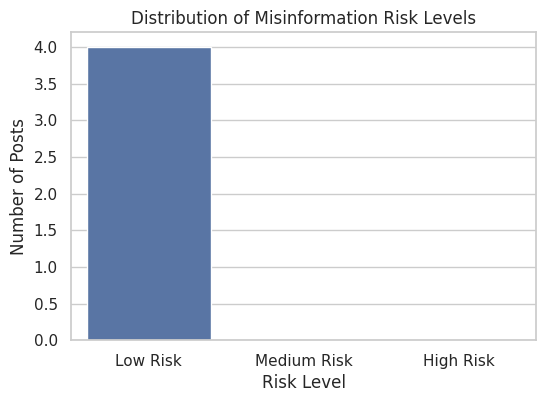

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="risk_level", data=df, order=["Low Risk", "Medium Risk", "High Risk"])
plt.title("Distribution of Misinformation Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Number of Posts")
plt.show()


In [7]:
top_narratives = summary.head(10)
top_narratives


,topic,avg_risk_score,narrative_size
0,0,NaN,2
1,1,NaN,2


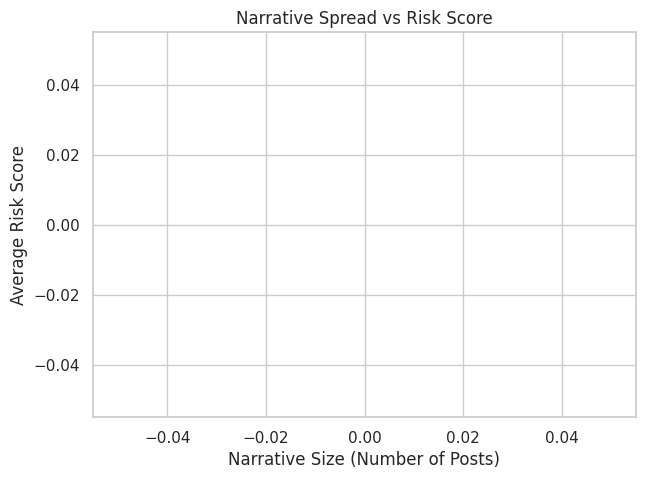

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=summary,
    x="narrative_size",
    y="avg_risk_score",
    size="narrative_size",
    legend=False
)
plt.title("Narrative Spread vs Risk Score")
plt.xlabel("Narrative Size (Number of Posts)")
plt.ylabel("Average Risk Score")
plt.show()


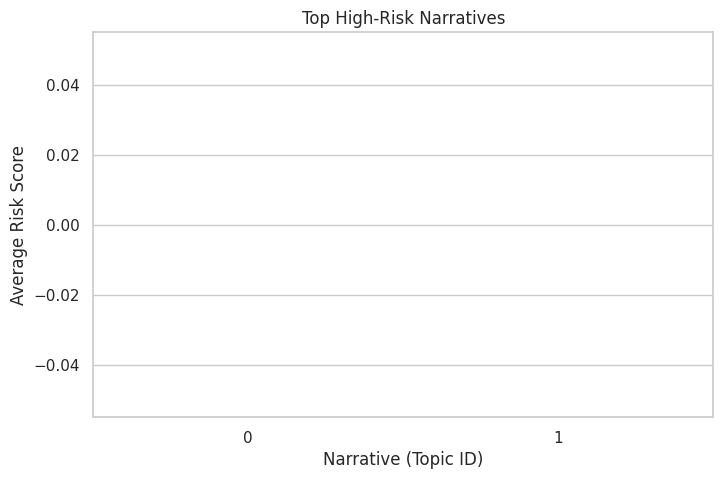

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_narratives,
    x="topic",
    y="avg_risk_score"
)
plt.title("Top High-Risk Narratives")
plt.xlabel("Narrative (Topic ID)")
plt.ylabel("Average Risk Score")
plt.show()


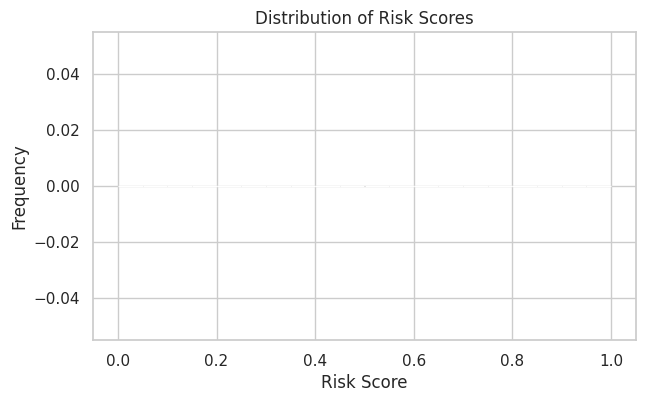

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(df["risk_score"], bins=20, kde=True)
plt.title("Distribution of Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.show()


In [11]:
df.sort_values("risk_score", ascending=False)[[
    "clean_text",
    "topic",
    "risk_score",
    "risk_level"
]].head(5)


,clean_text,topic,risk_score,risk_level
0,vaccine cause serious side effect accord report,0,NaN,Low Risk
1,g tower spread harmful radiation,0,NaN,Low Risk
2,government confirm vaccine safety trial,1,NaN,Low Risk
3,social medium claim microchip vaccine spread r...,1,NaN,Low Risk


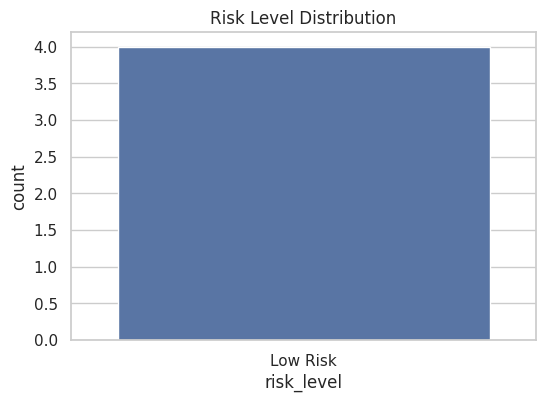

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="risk_level", data=df)
plt.title("Risk Level Distribution")

plt.show()   # show in notebook
plt.savefig("../data/processed/risk_level_distribution.png")
plt.close()
